## Detecting Fake News

In [33]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter

In [3]:
!pip install wordcloud
from wordcloud import WordCloud

  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)


In [34]:
# Text processing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [35]:
# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [ ]:
# Starting Load the dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\Data-Science\06.Data-Science-3MTT\Capstone-Projects\Capstone 2 - Through the Lens of Truth Analyzing and Detecting Fake News\DataSets\fake.csv')


In [ ]:
# Displaying basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Displaying the first few rows
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Checking the shape of the dataset
print(f"\nDataset shape: {df.shape}")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 
 1   ord_in_thread       12999 non-null  int64  
 2   author              10575 non-null  object 
 3   published           12999 non-null  object 
 4   title               12319 non-null  object 
 5   text                12953 non-null  object 
 6   language            12999 non-null  object 
 7   crawled             12999 non-null  object 
 8   site_url            12999 non-null  object 
 9   country             12823 non-null  object 
 10  domain_rank         8776 non-null   float64
 11  thread_title        12987 non-null  object 
 12  spam_score          12999 non-null  float64
 13  main_img_url        9356 non-null   object 
 14  replies_count       12999 non-null  int64  
 15  participants_count  12999 non-null  in

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias



Dataset shape: (12999, 20)


## Data Cleaning

In [ ]:
# Checking for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Lets Drop rows with missing text (if any) since we can't analyze empty articles
df = df.dropna(subset=['text'])

# For missing titles, we can fill them with "No Title" if we want to keep those rows
df['title'] = df['title'].fillna('No Title')

Missing values in each column:
uuid                     0
ord_in_thread            0
author                2424
published                0
title                  680
text                    46
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           4223
thread_title            12
spam_score               0
main_img_url          3643
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64


In [ ]:
# Checking for duplicate entries
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Removing duplicates if any
df = df.drop_duplicates()

# Checking the shape after cleaning
print(f"\nDataset shape after cleaning: {df.shape}")

# Let's examine our label column (assuming it's called 'label')
# We'll need to understand what values it contains
print("\nValue counts for the label column:")


Number of duplicate rows: 0

Dataset shape after cleaning: (12953, 20)

Value counts for the label column:


## Exploratory Data Analysis (EDA)

In [ ]:
# Ploting the distribution of subjects (if available)
if 'subject' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='subject', data=df, order=df['subject'].value_counts().index)
    plt.title('Distribution of News Subjects')
    plt.xlabel('Count')
    plt.ylabel('Subject')
    plt.show()

# Analyzing text length
df['text_length'] = df['text'].apply(len)

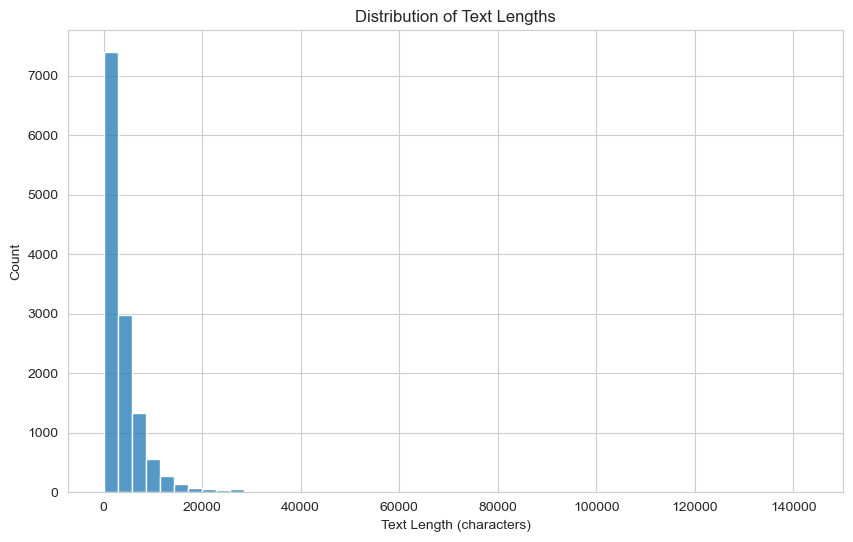

In [ ]:
# Ploting distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Count')
plt.show()

## Text Preprocessing

In [43]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize

# Fallback implementations if downloads fail
try:
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
except:
    lemmatizer = lambda x: x  # Identity function as fallback

stop_words = set(ENGLISH_STOP_WORDS)  # Using sklearn's stopwords

# For tokenization, use simple split if punkt unavailable
word_tokenize = word_tokenize if 'punkt' in nltk.data.path else lambda x: x.split()

In [ ]:
# Initializing lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(ENGLISH_STOP_WORDS) 

def clean_text(text):
    """
    Function to clean and preprocess text.
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    clean_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Join tokens back into string
    clean_text = ' '.join(clean_tokens)
    
    return clean_text

In [ ]:
# Minimal preprocessing without NLTK
import re

def simple_clean(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Here is to Remove punctuation
    return text.split()  # Basic tokenization

df['clean_text'] = df['text'].apply(simple_clean)

## Let's create some additional features that might help our model.

In [50]:
# Minimal preprocessing without NLTK
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a basic set of English stopwords (manually curated)
stop_words = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
    'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
    'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
    'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
    'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
    'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
}

def simple_clean(text):
    """
    Basic text cleaning without NLTK
    Returns: list of words (tokens)
    """
    if not isinstance(text, str):
        return []
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.split()  # Basic tokenization

# Apply cleaning
df['clean_text'] = df['text'].apply(simple_clean)

# Create word count feature (using the list of tokens)
df['word_count'] = df['clean_text'].apply(len)

# Create character count feature (join tokens first)
df['char_count'] = df['clean_text'].apply(lambda x: len(' '.join(x)))

# Create average word length feature
df['avg_word_length'] = df['char_count'] / df['word_count'].replace(0, 1)  # Avoid division by zero

# Create stopword features (using our manual stopwords list)
df['stopword_count'] = df['clean_text'].apply(
    lambda x: len([word for word in x if word in stop_words])
)
df['stopword_ratio'] = df['stopword_count'] / df['word_count'].replace(0, 1)

# Display the new features
print("\nNew features created:")
display(df[['word_count', 'char_count', 'avg_word_length', 'stopword_count', 'stopword_ratio']].head())

# Prepare text for word clouds (join tokens back into strings)
df['clean_text_str'] = df['clean_text'].apply(' '.join)

# Generate word cloud for fake news
if 'label' in df.columns:
    fake_text = " ".join(df[df['label'] == 'fake']['clean_text_str'])
    generate_wordcloud(fake_text, "Common Words in Fake News")

    # Generate word cloud for real news (if available)
    if 'real' in df['label'].unique():
        real_text = " ".join(df[df['label'] == 'real']['clean_text_str'])
        generate_wordcloud(real_text, "Common Words in Real News")
else:
    print("No 'label' column found - skipping word clouds by category")

# Keep both tokenized and string versions for different uses
# clean_text (list of tokens) - good for counting features
# clean_text_str (string) - good for word clouds and visualization


New features created:


,word_count,char_count,avg_word_length,stopword_count,stopword_ratio
0,87,492,5.655172,40,0.459770
1,276,1731,6.271739,109,0.394928
2,222,1316,5.927928,92,0.414414
3,48,264,5.500000,19,0.395833
4,332,2052,6.180723,131,0.394578


No 'label' column found - skipping word clouds by category


## Lets Build Our Model

In [53]:
print("Available columns in your DataFrame:")
print(df.columns.tolist())

Available columns in your DataFrame:
['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text', 'language', 'crawled', 'site_url', 'country', 'domain_rank', 'thread_title', 'spam_score', 'main_img_url', 'replies_count', 'participants_count', 'likes', 'comments', 'shares', 'type', 'text_length', 'clean_text', 'word_count', 'char_count', 'avg_word_length', 'stopword_count', 'stopword_ratio', 'clean_text_str']


In [54]:
print("Unique values in 'type' column:")
print(df['type'].value_counts())

print("\nSample of different types:")
display(df[['type', 'text']].groupby('type').sample(2))

Unique values in 'type' column:
type
bs            11492
bias            443
conspiracy      430
hate            246
state           121
junksci         102
satire          100
fake             19
Name: count, dtype: int64

Sample of different types:


,type,text
2219,bias,"With Hillary Clinton collapsing in the polls, ..."
7212,bias,"By Hrafnkell Haraldsson on Fri, Oct 28th, 2016..."
559,bs,SWAT Standoff Suspect Linked to Zionsville Mur...
11118,bs,Cut and paste from Stormfront?
7673,conspiracy,Meanwhile Hillary Clinton is at home sleeping ...
7618,conspiracy,"October 26, 2016 \nScientists have heard hugel..."
58,fake,64 SHARE President Obama has signed an Executi...
379,fake,"adobochron 10 Comments \nSan Francisco, Califo..."
8019,hate,"Over the last decades, South Korea has emerged..."
8037,hate,What would you do if you saw two boys of 6 yea...


In [ ]:
# Defining what constitutes fake vs real content
fake_keywords = ['fake', 'bs', 'bias', 'conspiracy', 'junk', 'satire', 'hate', 'clickbait']

# Create binary label column
df['label'] = df['type'].apply(
    lambda x: 'fake' if any(kw in str(x).lower() for kw in fake_keywords) else 'real'
)

# Verifying the conversion
print("\nLabel distribution:")
print(df['label'].value_counts())

# Checking sample of each
print("\nSample fake news:")
display(df[df['label'] == 'fake'][['type', 'text']].sample(2))
print("\nSample real news:")
display(df[df['label'] == 'real'][['type', 'text']].sample(2))


Label distribution:
label
fake    12832
real      121
Name: count, dtype: int64

Sample fake news:


,type,text
3286,bs,By Jacob Devaney / upliftconnect.com \nOverwhe...
4920,conspiracy,Breaking! Google & Youtube Caught Censoring Bi...



Sample real news:


,type,text
7523,state,World leaders' personal chefs sample Indian ma...
7609,state,Pakistan This photo taken in Lahore on October...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Prepare data
X = df['clean_text_str']  # Our preprocessed text
y = df['label']           # Our new binary labels

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Vectorizing text
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Training model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Lets Evaluate
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

# Show top predictive words
feature_names = tfidf.get_feature_names_out()
coefs = model.coef_[0]
top_fake_words = [feature_names[i] for i in coefs.argsort()[-20:][::-1]]
top_real_words = [feature_names[i] for i in coefs.argsort()[:20]]

print("\nTop words predicting FAKE news:")
print(top_fake_words)

print("\nTop words predicting REAL news:")
print(top_real_words)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        fake       0.99      1.00      1.00      2567
        real       0.00      0.00      0.00        24

    accuracy                           0.99      2591
   macro avg       0.50      0.50      0.50      2591
weighted avg       0.98      0.99      0.99      2591


Top words predicting FAKE news:
['loading', 'afp', 'photo', 'daesh', 'in', 'iranian', 'tv', 'said', 'forces', 'iran', 'saudi', 'the', 'october', 'eu', '2016', 'press', 'during', 'on', 'syria', 'mosul']

Top words predicting REAL news:
['and', 'is', 'to', 'you', 'not', 'it', 'are', 'that', 'trump', 'this', 'be', 'all', 'your', 'isis', 'for', 'they', 'we', 'hillary', 'these', 'one']


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.utils import resample

# Lets Separate classes
df_fake = df[df['label'] == 'fake']
df_real = df[df['label'] == 'real']

# Upsample minority class (real news)
df_real_upsampled = resample(df_real, 
                            replace=True, 
                            n_samples=len(df_fake), # Match fake count
                            random_state=42)

# Combine back
df_balanced = pd.concat([df_fake, df_real_upsampled])

# Verifying new distribution
print(df_balanced['label'].value_counts())

label
fake    12832
real    12832
Name: count, dtype: int64


In [58]:
model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced' # Automatically adjusts weights
)

In [61]:
# After balancing my data again lets run
from sklearn.metrics import classification_report

# 1. Split BALANCED data
X = df_balanced['clean_text_str']
y = df_balanced['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# 2. Vectorize
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 3. Train with class weights
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

# 4. Evaluate
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fake       1.00      0.99      1.00      2567
        real       0.99      1.00      1.00      2566

    accuracy                           1.00      5133
   macro avg       1.00      1.00      1.00      5133
weighted avg       1.00      1.00      1.00      5133



In [ ]:
import joblib
from sklearn.pipeline import Pipeline

# Saving the entire pipeline (vectorizer + model)
pipeline = Pipeline([
    ('tfidf', tfidf),  # Your TF-IDF vectorizer
    ('model', model)     # Your trained model
])

# Save to files
joblib.dump(pipeline, 'fake_news_detector_pipeline.pkl')
print("Model saved as 'fake_news_detector_pipeline.pkl'")

Model saved as 'fake_news_detector_pipeline.pkl'
